In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
from virtualscada.vs import removeRows
from virtualscada.vs import fillValuesLRForward
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

# Data Processing

First we add some data to our project. In this sample we get rid of 30% of rows, removing a column in a given row with probability 50%.

In [2]:
p = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_p.csv', header = None)
q = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_q.csv', header = None)
v = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_v.csv', header = None)
a = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_a.csv', header = None)

In [4]:
pRemoved = removeRows(p, .3, colPercentage = .5)
qRemoved = removeRows(q, .3, colPercentage = .5)

..\virtualscada\vs.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataRemoved[i][j] = None


# Virtual SCADA

Then we fill in our missing values. Our code takes in the fixed real power, reactive power, voltage, and phase angle and fills in the missing values using linear regression trained on the supplied data.  

In [5]:
pFilled, qFilled = fillValuesLRForward(pRemoved, qRemoved, v, a)

# Results

Now we look at the results of our filling. The following code manually computes the RMSE of our fill by comparing it with the values we removed at the first step. 

In [6]:
numRows, numCols = p.shape
predictions = []
actuals = []
for i in range(numCols):
    for j in range(numRows):
        if np.isnan(pRemoved[i][j]):
            predictions.append(pFilled[i][j])
            actuals.append(p[i][j])
                
print(np.sqrt(np.nanmean((np.array(predictions)-np.array(actuals))**2)))

0.0048253951140950916


Here is a plot of the results. The first plot is the actual power, the second is the power after being filled, and the third plot is the plot of the power with the missing values

Text(0, 0.5, 'Voltage Magnitude')

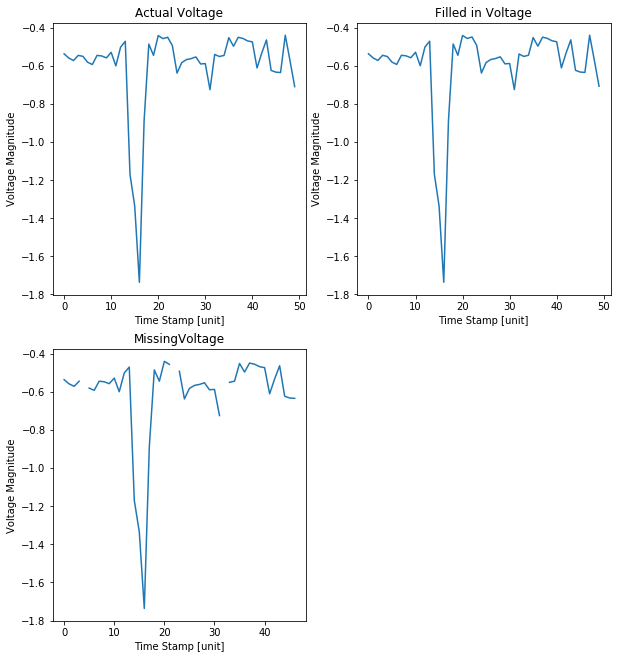

In [7]:
sampleBus = np.random.randint(0,29)

plt.figure(figsize=(10, 11))
plt.subplot(221)
plt.plot(p[sampleBus][0:50])
plt.title('Actual Voltage')
plt.xlabel('Time Stamp [unit]')
plt.ylabel('Voltage Magnitude')
plt.subplot(222)
plt.plot(pFilled[sampleBus][0:50])
plt.title('Filled in Voltage')
plt.xlabel('Time Stamp [unit]')
plt.ylabel('Voltage Magnitude')
plt.subplot(223)
plt.plot(pRemoved[sampleBus][0:50])
plt.title('MissingVoltage')
plt.xlabel('Time Stamp [unit]')
plt.ylabel('Voltage Magnitude')